## Building spark session

In [1]:
#from pyspark.sql import SparkSession

#spark  = SparkSession.builder\
#                  .master("spark://localhost:7077")\
#                  .enableHiveSupport()\
#                  .appName("migracao_dcp")\
#                  .getOrCreate()

#spark.conf.set("spark.executor.memory", '128m')
#spark.conf.set('spark.driver.cores', '1')
#spark.conf.set('spark.executor.cores', '1')
#spark.conf.set('spark.cores.max', '1')
#spark.conf.set("spark.driver.memory",'128m')
#spark.conf.set("spark.driver.port",'9000')
#spark.conf.set("spark.blockManager.port",'9002')
#spark.conf.set('spark.rpc.numRetries', '3')
#sc = spark.sparkContext

In [2]:
# “local” to run locally
# local[4]” to run locally with 4 cores
# “spark://master:7077” to run on a spark standalone cluster

## Usando RDDs

In [3]:
import random
def inside(p):
    x, y = random.random(), random.random()
    return x*x + y*y < 1
NUM_SAMPLES = 10000
count = sc.parallelize(range(0, NUM_SAMPLES)) \
             .filter(inside).count()
print("Pi is roughly %f" % (4.0 * count / NUM_SAMPLES))
#sc.stop()

Pi is roughly 3.114400


In [4]:
nomes = [{ 'nome': 'Gabriel', 'idade': 27} , { 'nome': 'Rafael', 'idade': 30}, {'nome': 'Marcia', 'idade': 20 }]
nomes_spark = sc.parallelize(nomes)
nomes_spark.map(lambda x: { 'nome': x['nome'].upper(), 'idade': x['idade'] / 2.0 }) \
            .filter(lambda x : x['idade'] >= 15) \
            .collect()

[{'nome': 'RAFAEL', 'idade': 15.0}]

In [5]:
df = spark.read.csv('ncov-2019/covid_19_data.csv', header=True, inferSchema=True)

In [6]:
df.show(20)

+---+---------------+--------------+--------------+---------------+---------+------+---------+
|SNo|ObservationDate|Province/State|Country/Region|    Last Update|Confirmed|Deaths|Recovered|
+---+---------------+--------------+--------------+---------------+---------+------+---------+
|  1|     01/22/2020|         Anhui|Mainland China|1/22/2020 17:00|      1.0|   0.0|      0.0|
|  2|     01/22/2020|       Beijing|Mainland China|1/22/2020 17:00|     14.0|   0.0|      0.0|
|  3|     01/22/2020|     Chongqing|Mainland China|1/22/2020 17:00|      6.0|   0.0|      0.0|
|  4|     01/22/2020|        Fujian|Mainland China|1/22/2020 17:00|      1.0|   0.0|      0.0|
|  5|     01/22/2020|         Gansu|Mainland China|1/22/2020 17:00|      0.0|   0.0|      0.0|
|  6|     01/22/2020|     Guangdong|Mainland China|1/22/2020 17:00|     26.0|   0.0|      0.0|
|  7|     01/22/2020|       Guangxi|Mainland China|1/22/2020 17:00|      2.0|   0.0|      0.0|
|  8|     01/22/2020|       Guizhou|Mainland China

## Temp tables

## Renaming columns

In [7]:
df = df.withColumnRenamed("SNo","sno") \
           .withColumnRenamed("ObservationDate","observation_date") \
            .withColumnRenamed("Country/Region", "country_region") \
            .withColumnRenamed("Province/State", "province_state") \
            .withColumnRenamed("Last Update", "last_update")

In [8]:
df.show(10)

+---+----------------+--------------+--------------+---------------+---------+------+---------+
|sno|observation_date|province_state|country_region|    last_update|Confirmed|Deaths|Recovered|
+---+----------------+--------------+--------------+---------------+---------+------+---------+
|  1|      01/22/2020|         Anhui|Mainland China|1/22/2020 17:00|      1.0|   0.0|      0.0|
|  2|      01/22/2020|       Beijing|Mainland China|1/22/2020 17:00|     14.0|   0.0|      0.0|
|  3|      01/22/2020|     Chongqing|Mainland China|1/22/2020 17:00|      6.0|   0.0|      0.0|
|  4|      01/22/2020|        Fujian|Mainland China|1/22/2020 17:00|      1.0|   0.0|      0.0|
|  5|      01/22/2020|         Gansu|Mainland China|1/22/2020 17:00|      0.0|   0.0|      0.0|
|  6|      01/22/2020|     Guangdong|Mainland China|1/22/2020 17:00|     26.0|   0.0|      0.0|
|  7|      01/22/2020|       Guangxi|Mainland China|1/22/2020 17:00|      2.0|   0.0|      0.0|
|  8|      01/22/2020|       Guizhou|Mai

In [9]:
df.createOrReplaceTempView("covid")

In [10]:
df = spark.sql('select sno, observation_date, province_state, country_region, last_update, ' + \
      ' Confirmed as confirmed, Deaths as death, Recovered as recovered ' + \
      ' from covid')

In [11]:
df.show(20)

+---+----------------+--------------+--------------+---------------+---------+-----+---------+
|sno|observation_date|province_state|country_region|    last_update|confirmed|death|recovered|
+---+----------------+--------------+--------------+---------------+---------+-----+---------+
|  1|      01/22/2020|         Anhui|Mainland China|1/22/2020 17:00|      1.0|  0.0|      0.0|
|  2|      01/22/2020|       Beijing|Mainland China|1/22/2020 17:00|     14.0|  0.0|      0.0|
|  3|      01/22/2020|     Chongqing|Mainland China|1/22/2020 17:00|      6.0|  0.0|      0.0|
|  4|      01/22/2020|        Fujian|Mainland China|1/22/2020 17:00|      1.0|  0.0|      0.0|
|  5|      01/22/2020|         Gansu|Mainland China|1/22/2020 17:00|      0.0|  0.0|      0.0|
|  6|      01/22/2020|     Guangdong|Mainland China|1/22/2020 17:00|     26.0|  0.0|      0.0|
|  7|      01/22/2020|       Guangxi|Mainland China|1/22/2020 17:00|      2.0|  0.0|      0.0|
|  8|      01/22/2020|       Guizhou|Mainland Chin

In [12]:
df.createOrReplaceTempView("covid")

In [13]:
df_by_region = spark.sql("select country_region, sum(confirmed) confirmed, sum(death) death, sum(recovered) recovered " + \
                        " from covid  group by country_region order by sum(death) desc")
df_by_region.show()

+--------------+---------+-------+---------+
|country_region|confirmed|  death|recovered|
+--------------+---------+-------+---------+
|Mainland China|2797319.0|90161.0|1154040.0|
|         Italy| 118103.0| 6773.0|   9904.0|
|          Iran|  88374.0| 3466.0|  24019.0|
|   South Korea| 104758.0|  733.0|   2849.0|
|         Spain|  21519.0|  538.0|   1242.0|
|        France|  20119.0|  395.0|    270.0|
|            US|  12073.0|  317.0|    210.0|
|         Japan|   9153.0|  175.0|   1388.0|
|        Others|  19868.0|  123.0|   1594.0|
|          Iraq|    819.0|   64.0|     92.0|
|            UK|   4778.0|   63.0|    312.0|
|     Hong Kong|   2678.0|   60.0|    660.0|
|   Philippines|    447.0|   54.0|     37.0|
|   Netherlands|   4233.0|   44.0|      2.0|
|   Switzerland|   5851.0|   42.0|     39.0|
|     Australia|   1833.0|   34.0|    457.0|
|        Taiwan|   1304.0|   28.0|    266.0|
|       Germany|  19195.0|   26.0|    485.0|
|    San Marino|    517.0|   24.0|      4.0|
|      Tha

## Barplots

In [14]:
df_pandas_by_region = df_by_region.limit(5).toPandas()

In [15]:
df_pandas_by_region

,country_region,confirmed,death,recovered
0,Mainland China,2797319.0,90161.0,1154040.0
1,Italy,118103.0,6773.0,9904.0
2,Iran,88374.0,3466.0,24019.0
3,South Korea,104758.0,733.0,2849.0
4,Spain,21519.0,538.0,1242.0


In [16]:
regions = list(df_pandas_by_region['country_region'])
deaths = list(df_pandas_by_region['death'])

Text(0, 0.5, 'Deaths')

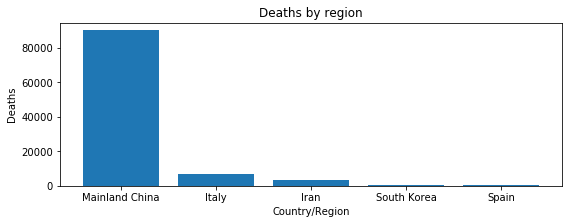

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(9, 3))
plt.bar(regions, deaths)
plt.title('Deaths by region')
plt.xlabel('Country/Region')
plt.ylabel('Deaths')

## User defined functions

In [18]:
from pyspark.sql.types import DoubleType
from math import log

In [19]:
def log_deaths(n):
    if (n > 0):
        return log(n)
    return 0.0

In [20]:
log_deaths(2)

0.6931471805599453

In [21]:
spark.udf.register("log_udf", log_deaths, DoubleType())

<function __main__.log_deaths(n)>

In [22]:
df_by_region.createOrReplaceTempView("df_by_region")
df_by_region_log = spark.sql("select country_region, log_udf(death) death from df_by_region")
df_by_region_log.show()

+--------------+------------------+
|country_region|             death|
+--------------+------------------+
|Mainland China|11.409352240045228|
|         Italy| 8.820699399214904|
|          Iran| 8.150756470275551|
|   South Korea| 6.597145701886651|
|         Spain|6.2878585601617845|
|        France| 5.978885764901122|
|            US|  5.75890177387728|
|         Japan|5.1647859739235145|
|        Others| 4.812184355372417|
|          Iraq|4.1588830833596715|
|            UK| 4.143134726391533|
|     Hong Kong|   4.0943445622221|
|   Philippines|3.9889840465642745|
|   Netherlands| 3.784189633918261|
|   Switzerland|3.7376696182833684|
|     Australia|3.5263605246161616|
|        Taiwan| 3.332204510175204|
|       Germany| 3.258096538021482|
|    San Marino|3.1780538303479458|
|      Thailand|2.6390573296152584|
+--------------+------------------+
only showing top 20 rows



In [23]:
df_pandas_by_region_log = df_by_region_log.limit(10).toPandas()

In [24]:
regions = list(df_pandas_by_region_log['country_region'])
deaths = list(df_pandas_by_region_log['death'])

Text(0, 0.5, 'Deaths')

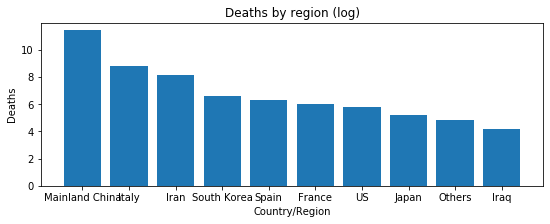

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(9, 3))
plt.bar(regions, deaths)
plt.title('Deaths by region (log)')
plt.xlabel('Country/Region')
plt.ylabel('Deaths')

In [26]:
 df_by_region \
  .write.format('jdbc') \
  .options( \
      url='jdbc:mysql://localhost:3306/db_poc_spark', \
      driver='com.mysql.cj.jdbc.Driver',\
      dbtable='tb_deaths_by_region',\
      user='root',\
      password='extreme123').mode('overwrite').save()

In [27]:
df_from_mysql =  spark \
  .read.format('jdbc') \
  .options( \
      url='jdbc:mysql://localhost:3306/db_poc_spark', \
      driver='com.mysql.cj.jdbc.Driver',\
      dbtable='tb_deaths_by_region',\
      user='root',\
      password='extreme123').load()

In [28]:
df_from_mysql.show(20)

+--------------+---------+-------+---------+
|country_region|confirmed|  death|recovered|
+--------------+---------+-------+---------+
|         Spain|  21519.0|  538.0|   1242.0|
|          Iran|  88374.0| 3466.0|  24019.0|
|Mainland China|2797319.0|90161.0|1154040.0|
|         Italy| 118103.0| 6773.0|   9904.0|
|   South Korea| 104758.0|  733.0|   2849.0|
|            US|  12073.0|  317.0|    210.0|
|        France|  20119.0|  395.0|    270.0|
|         Japan|   9153.0|  175.0|   1388.0|
|          Iraq|    819.0|   64.0|     92.0|
|        Others|  19868.0|  123.0|   1594.0|
|            UK|   4778.0|   63.0|    312.0|
|   Philippines|    447.0|   54.0|     37.0|
|     Australia|   1833.0|   34.0|    457.0|
|        Taiwan|   1304.0|   28.0|    266.0|
|   Switzerland|   5851.0|   42.0|     39.0|
|   Netherlands|   4233.0|   44.0|      2.0|
|       Germany|  19195.0|   26.0|    485.0|
|     Hong Kong|   2678.0|   60.0|    660.0|
|    San Marino|    517.0|   24.0|      4.0|
|      Tha